# K-Means Clustering

## Part 1: Data Processing
First we define and modify our dataset. For this model, I made a mapping that assigns each species a number (0, 1, or 2), so that we can later use the `make_labels` function to color the data points.

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.colors import ListedColormap

# custom color map allows consistent color choices
custom_cmap = ListedColormap(["pink", "lightseagreen", "orange"])

# Set theme 
sns.set_theme()

penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()

# Define labeling function for penguins species
def make_labels(y): 
    if y == 2: 
        return "orange"     
    elif y == 1:
        return "lightseagreen"
    else:
        return "pink"

X = penguins[["bill_length_mm", "bill_depth_mm"]].dropna().to_numpy()

# makes the species categories into numerical values
species_map = {
    "Adelie": 2,
    "Chinstrap": 1,
    "Gentoo": 0}

# Apply mapping
y = penguins["species"].map(species_map).values

In [136]:
# list of the correct numerical labels for each data point
labels = [make_labels(label) for label in y]

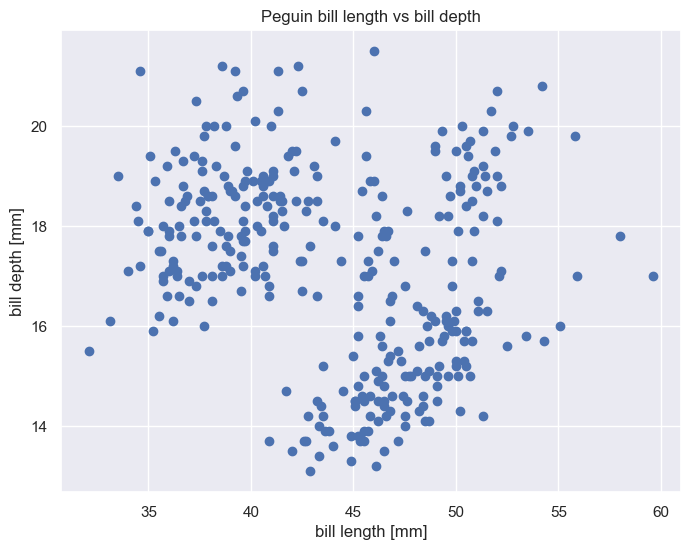

In [138]:
# plot showing raw data
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("bill length [mm]")
plt.ylabel("bill depth [mm]")
plt.title("Peguin bill length vs bill depth")
plt.show()

## Part 2: The Model

We will first choose 3 random data points to be the initial centers, and mark them in the plot below.

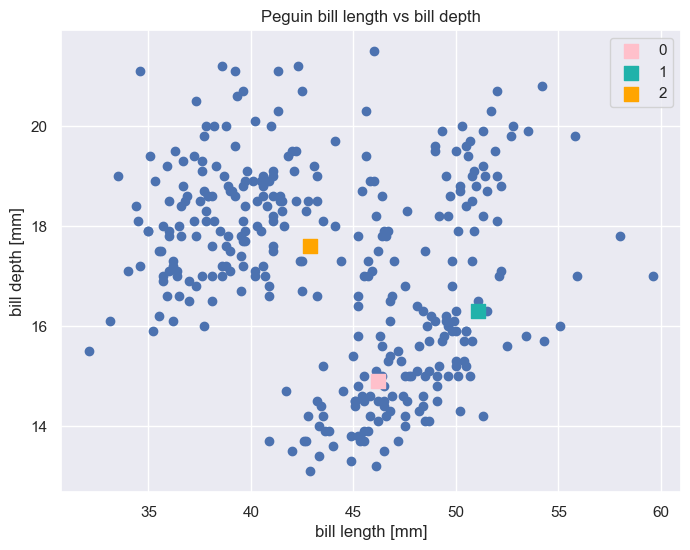

In [110]:
# empty list for randomly chosen center
centers = []

# chooses centers randomly from 333 data points
for k in range(3):
    i = np.random.randint(0, 333)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "pink", label = centers[0][2], s = 100, marker = 's')
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2], s = 100, marker = 's')
plt.scatter([centers[2][0]], [centers[2][1]], color = "orange", label = centers[2][2], s = 100, marker = 's')
plt.xlabel("bill length [mm]")
plt.ylabel("bill depth [mm]")
plt.title("Peguin bill length vs bill depth")
plt.legend()
plt.show()

### Helper Functions

In [78]:
# Computes the Euclidean distance between point X[i] and a given center
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

# Assigns the closest cluster label to point X[i] based on the current centers
def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

# Assigns a cluster label to every point in the dataset
def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

# Updates the cluster centers based on current assignments
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

Now we will see how our initial division into cluster compares to the true clusters. Here, the colors do not matter, but rather the distinction between different colors. For example, in the plots below, it is clear that the pink data points on the left and the orange data points on the right refer to the same cluster of data.

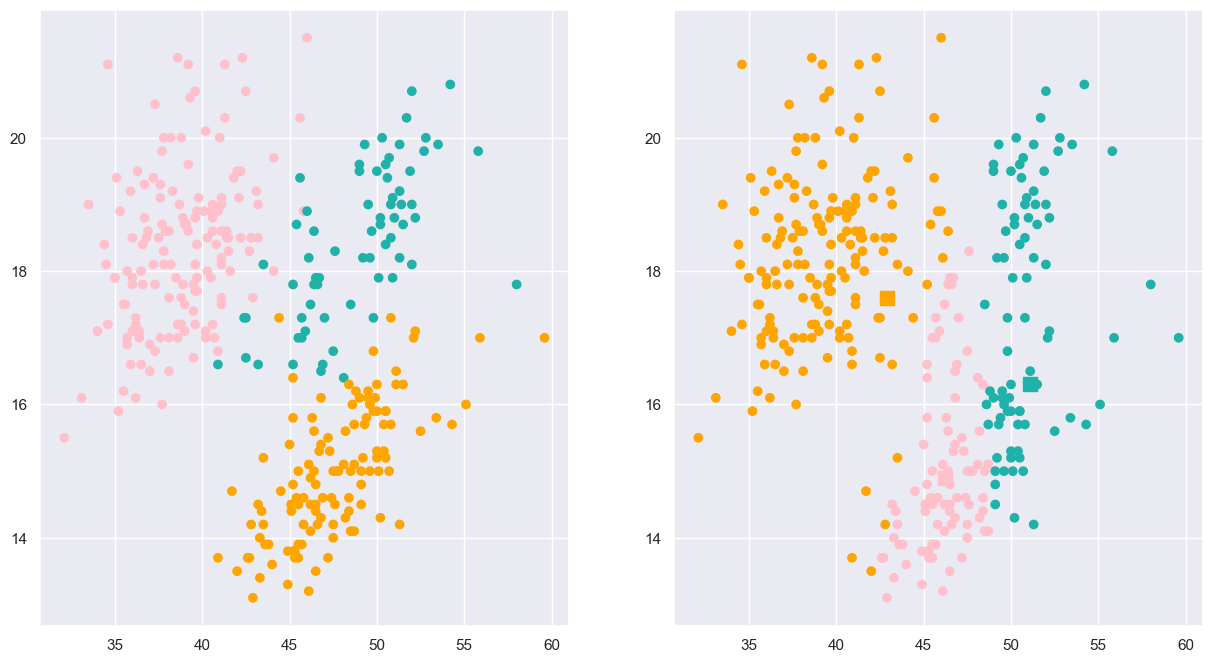

In [111]:
current_types = assign_clusters(X, centers)

current_labels = [make_labels(label) for label in current_types]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))
ax1.scatter(X[:, 0], X[:, 1], c = labels)

ax2.scatter(X[:, 0], X[:, 1], c = current_labels)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "pink", label = centers[0][2], s = 100, marker = 's')
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2], s = 100, marker = 's')
ax2.scatter([centers[2][0]], [centers[2][1]], color = "orange", label = centers[2][2], s = 100, marker = 's')

plt.show()

Next, we will generate new center based on the current centers. The `update_centers` function finds the avergae x and y coordinates of the current cluster and defines that as a new center point.

In [113]:
new_centers = update_centers(X, centers)

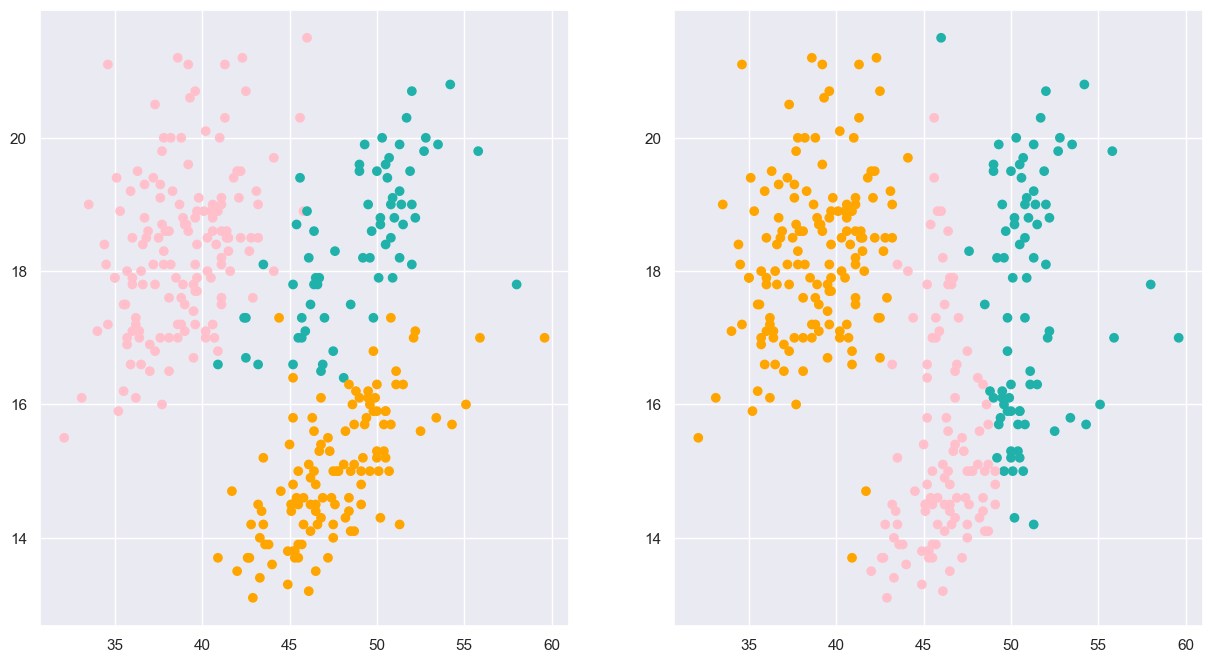

In [114]:
current_types = assign_clusters(X, new_centers)
current_labels = [make_labels(label) for label in current_types]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))
ax1.scatter(X[:, 0], X[:, 1], c = labels)

ax2.scatter(X[:, 0], X[:, 1], c = current_labels)

Repeating this process once more shows that the clusters are remaining more or less the same.

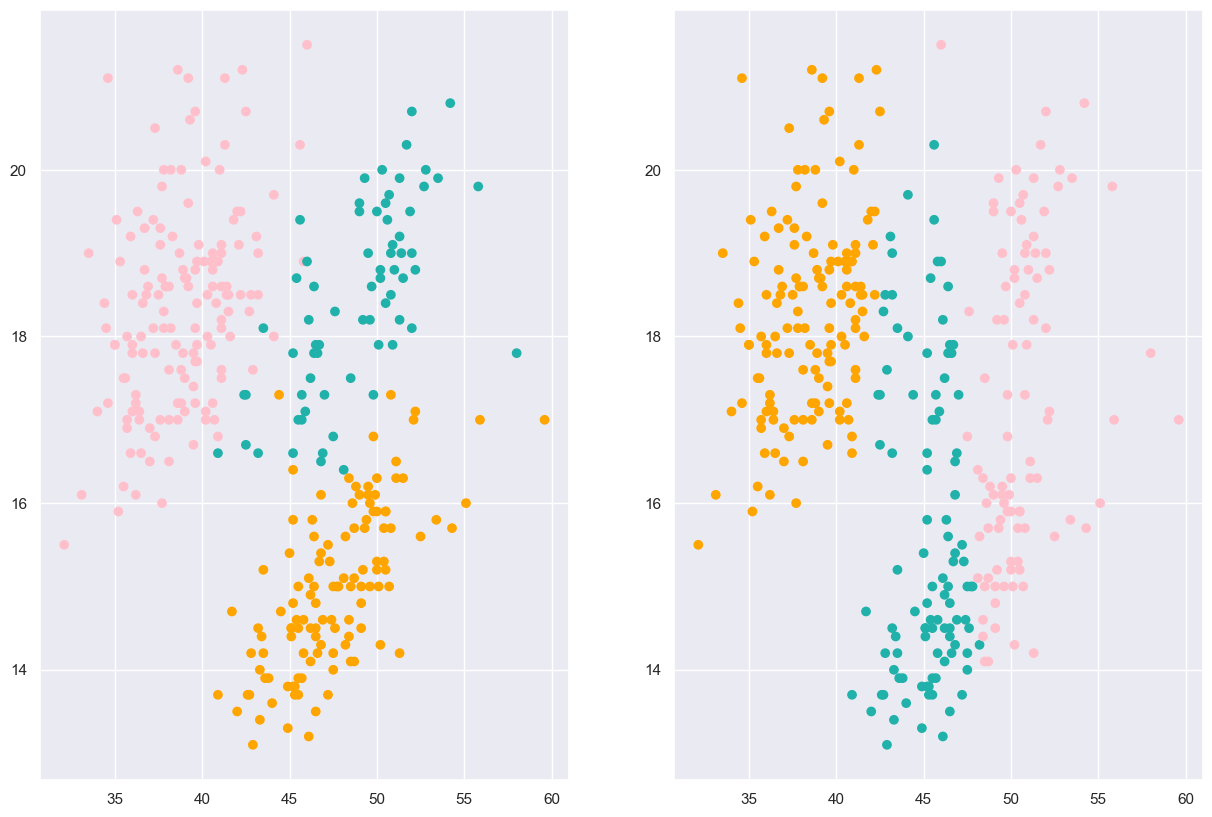

In [93]:
new_centers = update_centers(X, new_centers)
current_types = assign_clusters(X, new_centers)
current_labels = [make_labels(label) for label in current_types]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = labels)

ax2.scatter(X[:, 0], X[:, 1], c = current_labels)
plt.show()

Finally, the `k_means_clustering` function is able to repeat this process for many interations, allowing us to see how the clusterings would evolve over time.

In [143]:
# Runs the K-Means clustering algorithm on dataset X
# X: input data as a 2D NumPy array (n_samples × 2)
# k: number of clusters
# max_iter: maximum number of iterations to update the cluster centers

def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 333) # Randomly select a data point index (note: assumes X has at least 333 points)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

We run the model with 30 iterations.

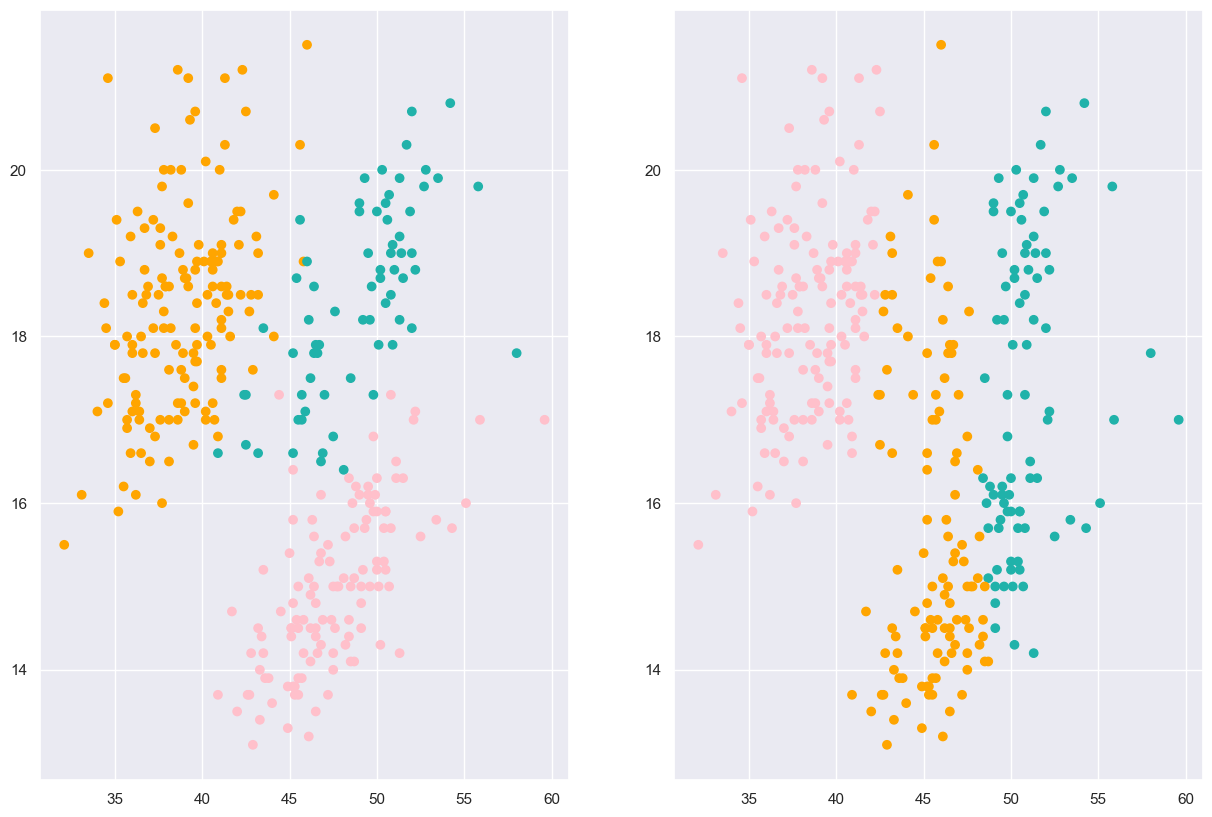

In [156]:
centers = k_means_clustering(X, 3, 30)
current_types = assign_clusters(X, centers)
current_labels = [make_labels(label) for label in current_types]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = labels)

ax2.scatter(X[:, 0], X[:, 1], c = current_types, cmap=custom_cmap)
plt.show()

And now we try 300.

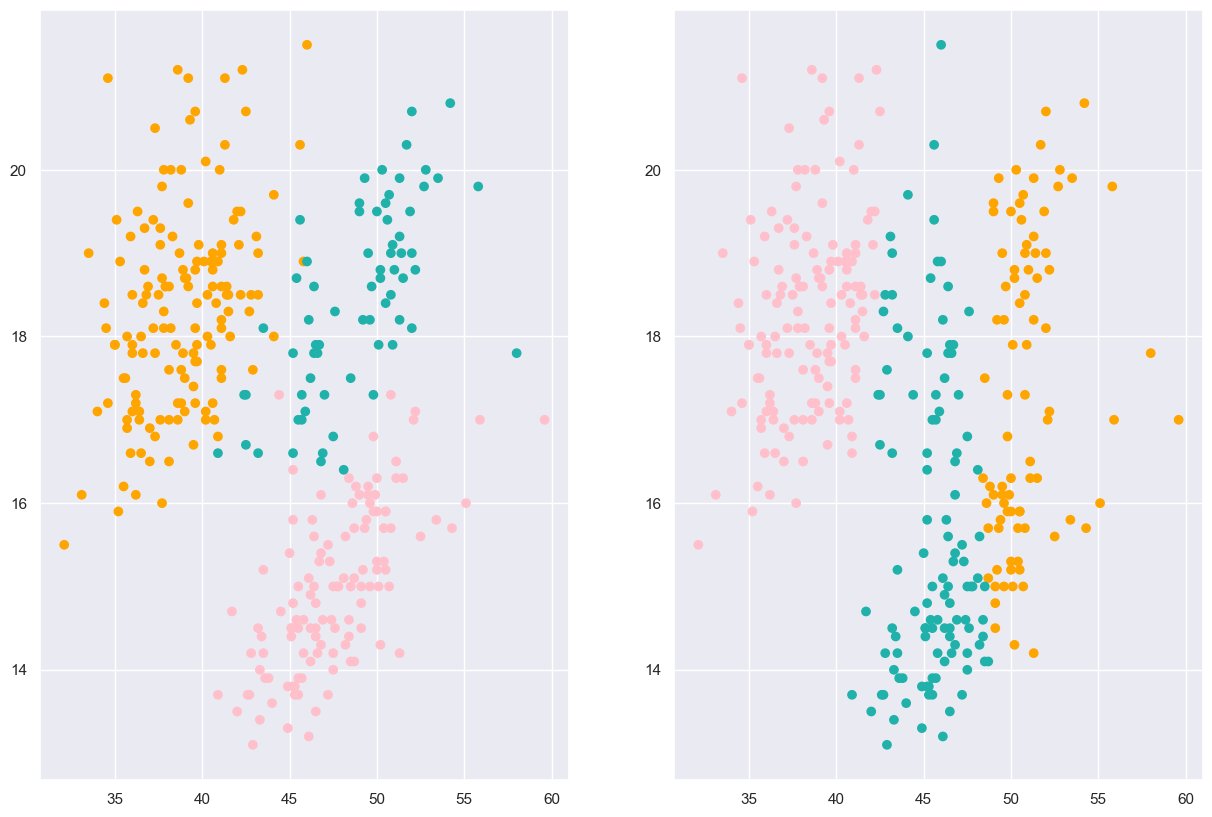

In [159]:
centers = k_means_clustering(X, 3, 300)
current_types = assign_clusters(X, centers)
current_labels = [make_labels(label) for label in current_types]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = labels)

ax2.scatter(X[:, 0], X[:, 1], c = current_types, cmap=custom_cmap)
plt.show()

### Conclusion

- In the test above, I found that after around 30 iterations, the model had converged on its clusters. In the plot above, I ran the algorithm for 300 iterations, but the partitioning is extremely close to the partitioning with 30 iterations. Though the model was able to accurately identify the upper right cluster (shown as orange on the left plots), it never correctly identified the other two clusters. However, this could be due to ambiguity in the shape of the data.